In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from conformalization import cp, coverage_and_length

In [2]:
path = "../results/uncertainty/conformal_results_start1_end99.npz"
cp_results = np.load(path, allow_pickle=True) 
print(f"keys: {cp_results.files}")

keys: ['confidence', 'LABEL_coverage', 'LABEL_length', 'LABEL_empty', 'APS_coverage', 'APS_length', 'APS_empty', 'MCP_LABEL_coverage', 'MCP_LABEL_length', 'MCP_LABEL_empty', 'MCP_APS_coverage', 'MCP_APS_length', 'MCP_APS_empty']


In [3]:
cov_dict = {}
len_dict = {}
empty_dict = {}
for type in ['LABEL', 'APS', 'MCP_LABEL', 'MCP_APS']:
    for evaluate in ['coverage', 'length', 'empty']:
        
        if evaluate == 'coverage':
            cov_dict[type] = cp_results[f"{type}_{evaluate}"]
        elif evaluate == 'length':
            len_dict[type] = cp_results[f"{type}_{evaluate}"]
        elif evaluate == 'empty':
            empty_dict[type] = cp_results[f"{type}_{evaluate}"]

In [4]:
df_cov = pd.DataFrame.from_dict(cov_dict)
df_len = pd.DataFrame.from_dict(len_dict)
df_empt = pd.DataFrame.from_dict(empty_dict)
df_cov.set_index(cp_results['confidence']*100, inplace=True)
df_len.set_index(cp_results['confidence']*100, inplace=True)
df_empt.set_index(cp_results['confidence']*100, inplace=True)

In [11]:
df_empt.loc[60, :]

LABEL         40
APS           41
MCP_LABEL    138
MCP_APS      312
Name: 60.0, dtype: int64

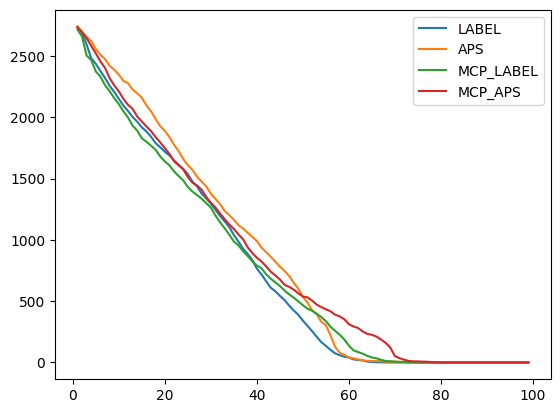

In [10]:
plt.plot(df_empt['LABEL'], label = 'LABEL')
plt.plot(df_empt['APS'], label = 'APS')
plt.plot(df_empt['MCP_LABEL'], label = 'MCP_LABEL')
plt.plot(df_empt['MCP_APS'], label = 'MCP_APS')
# plt.plot(100*np.arange(0.01, 0.99, 0.01), np.arange(0.01, 0.99, 0.01))
plt.legend()
plt.show()

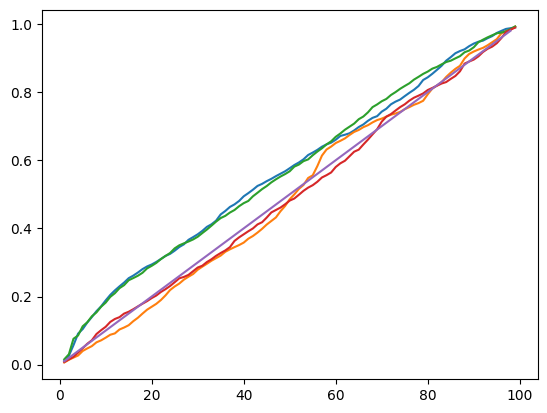

In [5]:
plt.plot(df_cov['LABEL'])
plt.plot(df_cov['APS'])
plt.plot(df_cov['MCP_LABEL'])
plt.plot(df_cov['MCP_APS'])
plt.plot(100*np.arange(0.01, 0.99, 0.01), np.arange(0.01, 0.99, 0.01))
plt.show()

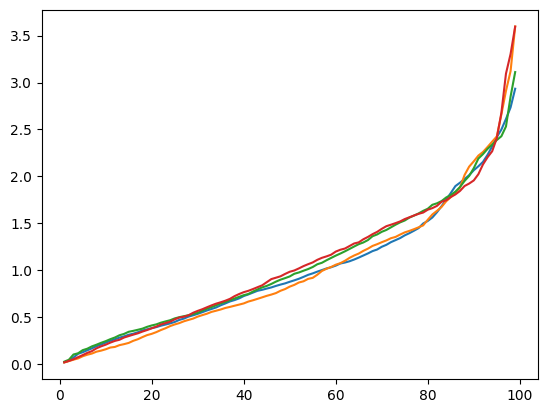

In [15]:
plt.plot(df_len['LABEL'])
plt.plot(df_len['APS'])
plt.plot(df_len['MCP_LABEL'])
plt.plot(df_len['MCP_APS'])
plt.show()

In [16]:
df_len

,LABEL,APS,MCP_LABEL,MCP_APS
1.0,0.019720,0.017569,0.026174,0.019362
2.0,0.035497,0.032270,0.046612,0.034421
3.0,0.070276,0.047329,0.102546,0.051990
4.0,0.110434,0.060595,0.115454,0.074220
5.0,0.126569,0.083542,0.148799,0.096092
...,...,...,...,...
95.0,2.418430,2.425242,2.387594,2.407314
96.0,2.499104,2.659735,2.428110,2.676945
97.0,2.612406,2.911438,2.532449,3.095375
98.0,2.735030,3.122266,2.850484,3.304410
